In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn.model_selection
import sklearn.ensemble

from sklearn.model_selection import GridSearchCV

In [22]:
data = pd.read_csv('datos1.csv')
data= data.rename(columns={"Salario Mensual en Millones de COP":"Salario"})

data

,Programa,Estudiantes totales,Mujeres,Hombres,Estudiantes nuevos,Graduados,Doble programa,Ranking programa,Profesores PhD,Profesores Maestría,Oferta Laboral,Años desde 2021,Salario
0,Administracion (2020),1108.5,509,650,152.5,257,203,2,55,11,35150,1,3.1
1,Administracion (2019),1028.5,457,563,112.5,276,214,1,57,12,35150,2,3.5
2,Administracion (2018),1004.0,447,572,99.5,252,240,2,62,12,35150,3,4.2
3,Arquitectura (2020),707.0,353,353,87.5,157,127,3,10,14,960,1,1.9
4,Arquitectura (2019),719.0,362,356,87.0,138,161,1,12,13,960,2,2.1
5,Arquitectura (2018),698.0,341,340,55.5,158,175,3,14,11,960,3,2.4
6,Diseño (2020),803.5,629,183,92.5,156,168,30,4,26,3019,1,2.1
7,Diseño (2019),787.0,582,199,84.5,159,185,30,5,26,3019,2,2.5
8,Diseño (2018),763.0,573,192,72.5,158,176,30,3,25,3019,3,2.7
9,Arte (2020),212.0,148,55,19.5,59,74,30,0,17,53,1,1.6


In [23]:
len(data)*0.3

26.7

In [24]:
predictors = list(data.keys())
predictors.remove('Programa')
predictors.remove('Salario')
print(predictors, np.shape(np.array(predictors)))

['Estudiantes totales', 'Mujeres', 'Hombres', 'Estudiantes nuevos', 'Graduados', 'Doble programa', 'Ranking programa', 'Profesores PhD', 'Profesores Maestría', 'Oferta Laboral\xa0', 'Años desde 2021'] (11,)


In [25]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                                    data[predictors], data['Salario'], test_size=0.3)

In [26]:
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=21)
rf.fit(X_train, y_train)
p = rf.predict(X_test)
p

array([2.47142857, 2.56666667, 1.8047619 , 2.37619048, 2.88571429,
       3.00952381, 2.9047619 , 2.78095238, 2.34285714, 3.53333333,
       2.64761905, 2.93333333, 2.70952381, 2.39047619, 2.41428571,
       2.69047619, 3.07619048, 2.2       , 2.97619048, 3.07142857,
       2.5       , 2.98571429, 2.96190476, 3.06666667, 3.03333333,
       2.56190476, 2.36190476])

In [27]:
print(p)
np.shape(p), np.shape(y_test)


[2.47142857 2.56666667 1.8047619  2.37619048 2.88571429 3.00952381
 2.9047619  2.78095238 2.34285714 3.53333333 2.64761905 2.93333333
 2.70952381 2.39047619 2.41428571 2.69047619 3.07619048 2.2
 2.97619048 3.07142857 2.5        2.98571429 2.96190476 3.06666667
 3.03333333 2.56190476 2.36190476]


((27,), (27,))

In [28]:
from sklearn.metrics import f1_score
print(rf.score(X_test, y_test))
n_trees = np.arange(1,100,1)
f1_train = []
f1_test = []
feature_importance = np.zeros((len(n_trees), len(predictors)))

for i, n_tree in enumerate(n_trees):
    rf = sklearn.ensemble.RandomForestRegressor(n_estimators=n_tree, max_features='sqrt')
    rf.fit(X_train, y_train)
    f1_train.append(rf.score(X_train, y_train))
    f1_test.append(rf.score(X_test, y_test))
    feature_importance[i, :] = rf.feature_importances_

0.5375899935285553


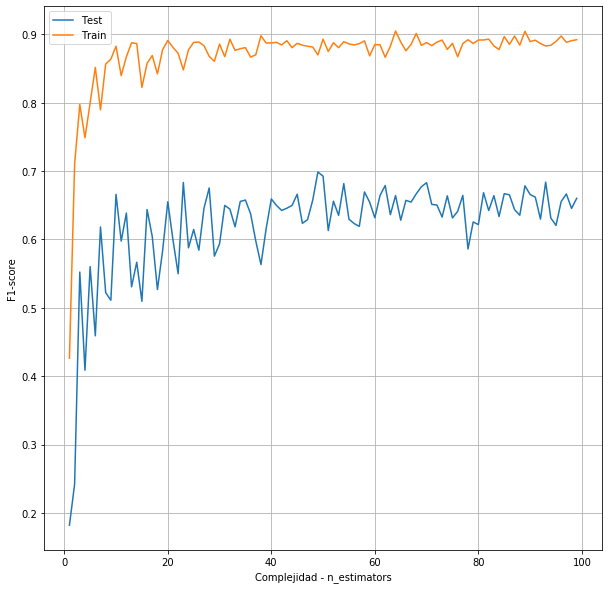

In [29]:
fig = plt.figure(figsize=(10,10))
plt.plot(n_trees, f1_test, label='Test')
plt.plot(n_trees, f1_train, label='Train')
plt.grid()
plt.legend()
plt.xlabel('Complejidad - n_estimators')
plt.ylabel('F1-score')
plt.show()

Estudiantes totales    0.094370
Mujeres                0.086464
Hombres                0.130212
Estudiantes nuevos     0.094568
Graduados              0.076478
Doble programa         0.125864
Ranking programa       0.026652
Profesores PhD         0.151493
Profesores Maestría    0.077249
Oferta Laboral         0.061707
Años desde 2021        0.074943
dtype: float64


Text(0.5, 0, 'Average Feature Importance')

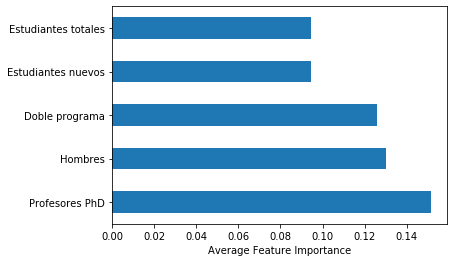

In [30]:
# Grafica los features mas importantes
avg_importance = np.average(feature_importance, axis=0)
a = pd.Series(avg_importance, index=predictors)
print(a)
a.nlargest().plot(kind='barh')
plt.xlabel('Average Feature Importance')

In [32]:
p = rf.predict(data[predictors])
p

array([3.12828283, 3.48282828, 3.67070707, 2.07373737, 2.1989899 ,
       2.46666667, 2.23636364, 2.48383838, 2.55050505, 1.82424242,
       1.83030303, 1.77373737, 2.29292929, 2.2979798 , 2.32929293,
       1.76868687, 2.29393939, 3.21818182, 2.09191919, 2.12727273,
       2.80808081, 2.04040404, 3.10606061, 2.32323232, 2.50606061,
       2.68181818, 2.51111111, 2.92525253, 3.21919192, 3.14444444,
       2.02222222, 2.21919192, 2.92828283, 2.1979798 , 2.23737374,
       2.24343434, 2.37979798, 2.43636364, 2.5959596 , 2.48989899,
       3.03131313, 3.02929293, 2.53636364, 2.54545455, 2.81414141,
       2.81717172, 3.0989899 , 2.34848485, 2.28181818, 2.6       ,
       2.62626263, 3.0989899 , 3.42525253, 3.7959596 , 3.2020202 ,
       3.47979798, 3.99393939, 2.47171717, 2.01010101, 2.38888889,
       2.64141414, 2.98383838, 2.22828283, 2.51717172, 2.95252525,
       2.33939394, 3.09393939, 3.18383838, 2.68787879, 2.93636364,
       3.27575758, 2.69494949, 2.6959596 , 3.05959596, 2.94242